In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Data Load

In [2]:
train = pd.read_csv("train.csv")

print(train.shape)
train.head()

(1310, 11)


,bad_hand,category,comments,good_hand,play_time,subscribers,title,top_comment,upload_date,url,views
0,495,스포츠,"댓글 3,033개",9.5천,12:58,88만,말레이시아전...너무 화가 납니다!,구독 부탁드립니다!!!!! 아시안게임 금메달 홧팅!!,게시일: 2018. 8. 17.,https://www.youtube.com/watch?v=tA3r-U8DU5c,"조회수 598,294회"
1,676,스포츠,"댓글 4,305개",1.6만,9:11,64만,조현우 vs 배드민턴 풀파워 스매싱. 월클골키퍼의 미친세이브 ㄷㄷㄷ l 슛포러브 S...,조현우 프리미어 리그에서 뛰는거보고 죽고싶다,게시일: 2018. 8. 16.,https://www.youtube.com/watch?v=WSiY7g255rs,"조회수 1,345,164회"
2,698,엔터테인먼트,0,4.1천,2:43,0,10년동안 사라졌던 이박사 '충격적인 근황',NaN,게시일: 2018. 8. 15.,https://www.youtube.com/watch?v=FlvYZcnGg-s,"조회수 1,223,462회"
3,8.8천,엔터테인먼트,"댓글 21,045개",9.1만,6:21,245만,메갈워마드트위터 드디어 검거했습니다. 합의는없습니다.,모두 ㅂㅇㄹ ^_^*\n고소많이했네요 드디어 첫번째\n구독과 좋아요 알람설정은 보겸...,게시일: 2018. 8. 13.,https://www.youtube.com/watch?v=ZikE3gRmUos,"조회수 3,158,695회"
4,559,영화/애니메이션,"댓글 2,669개",1.1만,7:55,48만,타노스는 왜 그동안 가만히 있었나,이번 영상은 원래 30분 분량으로 준비한 영상을 4부로 분리해서 하루에 한편씩 업로...,게시일: 2018. 8. 14.,https://www.youtube.com/watch?v=biiVgzPmB4A,"조회수 919,220회"


### Views
- 조회수
- 예측할 target

In [3]:
def views_clear(view):
    return int(view[4:-1].replace(",",""))

In [4]:
train["views"] = train["views"].apply(views_clear)

In [5]:
train["views"].head()

0     598294
1    1345164
2    1223462
3    3158695
4     919220
Name: views, dtype: int64

### Bad_hand
- '싫어요'라는 텍스트만 있는 경우 값은 url확인 결과 '0'인 경우이다.

In [6]:
train[train["bad_hand"]=='싫어요'].head(1)

,bad_hand,category,comments,good_hand,play_time,subscribers,title,top_comment,upload_date,url,views
19,싫어요,인물/블로그,"댓글 13,304개",좋아요,0:58,79만,로이조 TV 앞으로의 계획,* 이벤트 참고 영상 : https://youtu.be/SUMgOI6uKfk (허수...,게시일: 2018. 7. 27.,https://www.youtube.com/watch?v=XTVBsmgjI60,1972249


In [7]:
train.loc[train["bad_hand"]=='싫어요', 'bad_hand'] = '0'

In [8]:
train[train["bad_hand"]=='싫어요'].head(1)

,bad_hand,category,comments,good_hand,play_time,subscribers,title,top_comment,upload_date,url,views


In [9]:
def hand_clear(s):
    '''
    천, 만으로 표시된 값 숫자로 변경
    '''
    if s[-1] == '천':
        return float(s[:-1]) * 1000
    elif s[-1] == '만':
        return float(s[:-1]) * 10000
    else:
        return float(s)

In [10]:
train["bad_hand"] = train["bad_hand"].apply(hand_clear)

### Good_hand
- '좋아요'라는 텍스트만 있는 경우 값은 url확인 결과 '0'인 경우이다.

In [11]:
train[train["good_hand"]=='좋아요'].head(1)

,bad_hand,category,comments,good_hand,play_time,subscribers,title,top_comment,upload_date,url,views
19,0.0,인물/블로그,"댓글 13,304개",좋아요,0:58,79만,로이조 TV 앞으로의 계획,* 이벤트 참고 영상 : https://youtu.be/SUMgOI6uKfk (허수...,게시일: 2018. 7. 27.,https://www.youtube.com/watch?v=XTVBsmgjI60,1972249


In [12]:
train.loc[train["good_hand"]=='좋아요', 'good_hand'] = '0'

In [13]:
train[train["good_hand"]=='좋아요'].head(1)

,bad_hand,category,comments,good_hand,play_time,subscribers,title,top_comment,upload_date,url,views


In [14]:
train["good_hand"] = train["good_hand"].apply(hand_clear)

In [15]:
train[["bad_hand", "good_hand"]].head()

,bad_hand,good_hand
0,495.0,9500.0
1,676.0,16000.0
2,698.0,4100.0
3,8800.0,91000.0
4,559.0,11000.0


### Comments
- 댓글 갯수

In [16]:
def comments_clear(comment):
    if comment[-1] == "개":
        return int(comment[3:-1].replace(",",""))
    else:
        return int(comment)

In [17]:
train["comments"] = train["comments"].apply(comments_clear)

In [18]:
train["comments"].head()

0     3033
1     4305
2        0
3    21045
4     2669
Name: comments, dtype: int64

### Upload_date
- 게시년, 월, 일

In [19]:
s = '게시일: 2014. 2. 26.'

In [20]:
s[5:-1].replace(" ","").split(".")

['2014', '2', '26']

In [21]:
def upload_date_clear_year(date):
    return int(s[5:-1].replace(" ","").split(".")[0])

def upload_date_clear_month(date):
    return int(s[5:-1].replace(" ","").split(".")[1])

def upload_date_clear_day(date):
    return int(s[5:-1].replace(" ","").split(".")[2])

In [22]:
train["upload_date_year"] = train["upload_date"].apply(upload_date_clear_year)
train["upload_date_month"] = train["upload_date"].apply(upload_date_clear_month)
train["upload_date_day"] = train["upload_date"].apply(upload_date_clear_day)

In [23]:
train[["upload_date_year", "upload_date_month", "upload_date_day"]].head()

,upload_date_year,upload_date_month,upload_date_day
0,2014,2,26
1,2014,2,26
2,2014,2,26
3,2014,2,26
4,2014,2,26


### Subscribers
- 구독자 수

In [24]:
def subscriber_clear(s):
    '''
    천, 만으로 표시된 값 숫자로 변경
    '''
    if s[-1] == '천':
        return float(s[:-1]) * 1000
    elif s[-1] == '만':
        return float(s[:-1]) * 10000
    else:
        return float(s)

In [25]:
train["subscribers"] = train["subscribers"].apply(subscriber_clear)

In [26]:
train["subscribers"].head()

0     880000.0
1     640000.0
2          0.0
3    2450000.0
4     480000.0
Name: subscribers, dtype: float64

### Play time

In [27]:
def convert_time(t):
    if type(t) is float:
        return t
    else:
        return int(t.split(":")[0]) * 60 + int(t.split(":")[1])

In [28]:
train["play_time"] = train["play_time"].apply(convert_time)

In [29]:
train.loc[train["play_time"].isna(), "play_time"] = np.mean(train["play_time"])

In [30]:
train["play_time"].head()

0    778.0
1    551.0
2    163.0
3    381.0
4    475.0
Name: play_time, dtype: float64

### Length of title

In [31]:
def title_length(s):
    return len(s)

In [32]:
train["title_length"] = train["title"].apply(title_length)

In [33]:
train["title_length"].head()

0    19
1    59
2    24
3    29
4    18
Name: title_length, dtype: int64

In [34]:
train.columns

Index(['bad_hand', 'category', 'comments', 'good_hand', 'play_time',
       'subscribers', 'title', 'top_comment', 'upload_date', 'url', 'views',
       'upload_date_year', 'upload_date_month', 'upload_date_day',
       'title_length'],
      dtype='object')

In [35]:
train.head(1)

,bad_hand,category,comments,good_hand,play_time,subscribers,title,top_comment,upload_date,url,views,upload_date_year,upload_date_month,upload_date_day,title_length
0,495.0,스포츠,3033,9500.0,778.0,880000.0,말레이시아전...너무 화가 납니다!,구독 부탁드립니다!!!!! 아시안게임 금메달 홧팅!!,게시일: 2018. 8. 17.,https://www.youtube.com/watch?v=tA3r-U8DU5c,598294,2014,2,26,19


### Testing

In [36]:
X = train[["bad_hand", "good_hand", 'comments', 'play_time', 'subscribers', "upload_date_year", "upload_date_month", "title_length"]]
y = train["views"]

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)

In [38]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train ,X_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     790.5
Date:                Mon, 20 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:27:10   Log-Likelihood:                -16145.
No. Observations:                 877   AIC:                         3.230e+04
Df Residuals:                     870   BIC:                         3.234e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bad_hand           1131.8311     35.01

In [39]:
X_test = sm.add_constant(X_test)
prediction = results.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from math import sqrt

rmse_result = sqrt(mean_squared_error(y_test, prediction))
mae_result = mean_absolute_error(y_test, prediction)
#msle_result = mean_squared_log_error(y_test, prediction)

In [41]:
rmse_result

16438539.17514985

In [42]:
mae_result

4449530.3394539412

In [43]:
#msle_result

<BarContainer object of 433 artists>

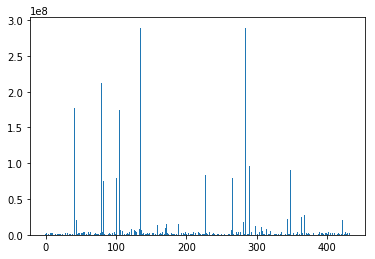

In [44]:
plt.bar(np.arange(0,len(y_test)), y_test)

<BarContainer object of 433 artists>

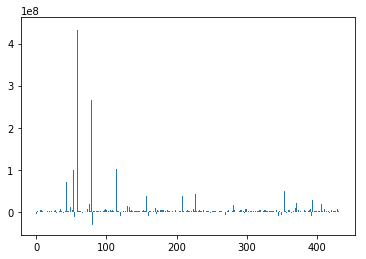

In [45]:
plt.bar(np.arange(0,len(prediction)), prediction)